### Pandas, MySQL - Bar plot, Line plot


Dataset ('classicmodels' MySQL database) http://www.mysqltutorial.org/mysql-sample-database.aspx  
http://www.mysqltutorial.org/tryit/

Matplotlib.pyplot API
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

Pandas API -> Plotting
https://pandas.pydata.org/pandas-docs/version/0.23/api.html

Seaborn API
https://seaborn.pydata.org/api.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
import seaborn as sns
import calendar

In [2]:
cnx = mysql.connector.connect(user='root', password='***',
                              host='localhost',
                              database='classicmodels')

In [3]:
sql_total_sale_by_country_payments_query = """ 
select c.country, SUM(p.amount) total
from customers c
join payments p on c.customerNumber=p.customerNumber
group by c.country;
""" 

In [4]:
sql_total_sale_by_country_orders_query = """ 
select c.country, SUM(od.quantityOrdered*od.priceEach) total
from orders o
join orderdetails od on o.orderNumber=od.orderNumber
join customers c on o.customerNumber=c.customerNumber
group by c.country
order by total desc;
""" 

In [5]:
sql_total_sale_by_year_requireddate_query = """ 
select year(o.requiredDate) year, SUM(od.quantityOrdered*priceEach) total
from  orders o
join orderdetails od on o.orderNumber=od.orderNumber
group by year;
""" 

In [6]:
sql_total_sale_by_year_shippeddate_query = """ 
select year(o.shippedDate) year, SUM(od.quantityOrdered*priceEach) total
from  orders o
join orderdetails od on o.orderNumber=od.orderNumber
where o.shippedDate is not Null
group by year;
""" 

In [7]:
sql_total_sale_by_month_shippeddate_query = """ 
select month(o.shippedDate) month, SUM(od.quantityOrdered*priceEach) total
from  orders o
join orderdetails od on o.orderNumber=od.orderNumber
where o.shippedDate is not Null and year(o.shippedDate)='2004'
group by month;
""" 

In [8]:
df1 = pd.read_sql_query(sql_total_sale_by_country_payments_query,cnx)
df1.sort_values('total',ascending=False, inplace=True)

In [9]:
df2 = pd.read_sql_query(sql_total_sale_by_country_orders_query,cnx)

In [10]:
df3 = pd.read_sql_query(sql_total_sale_by_year_requireddate_query,cnx)

In [11]:
df4 = pd.read_sql_query(sql_total_sale_by_year_shippeddate_query,cnx)

In [12]:
df5 = pd.read_sql_query(sql_total_sale_by_month_shippeddate_query,cnx)
df5.index=[calendar.month_abbr[month_idx] for month_idx in range(1,13)]

In [13]:
plt.style.use('ggplot')  # add style

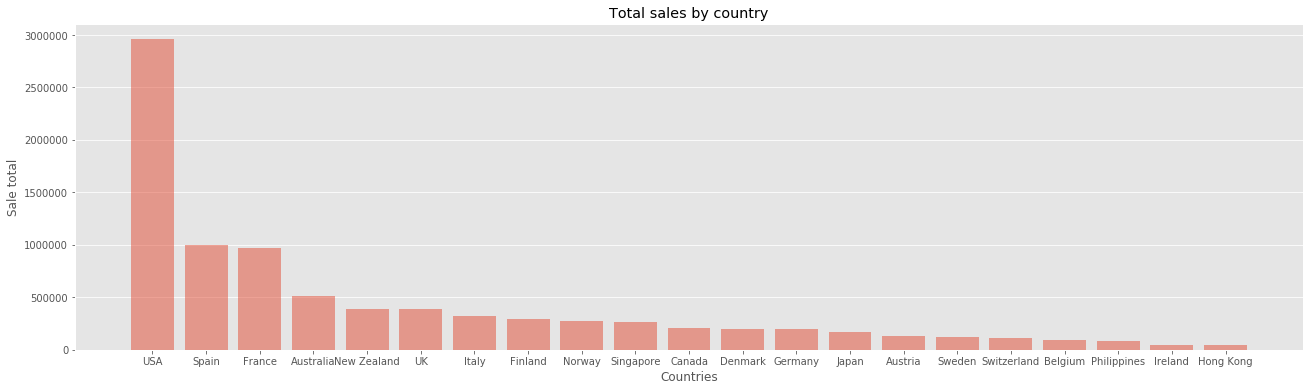

In [14]:
plt.figure(figsize=(22, 6))  # add size of plot
plt.bar(df1.country, df1.total,alpha=0.5)
plt.title('Total sales by country')
plt.xlabel('Countries')
plt.ylabel('Sale total')
plt.grid(axis='x')

Text(0, 0.5, 'Sale total')

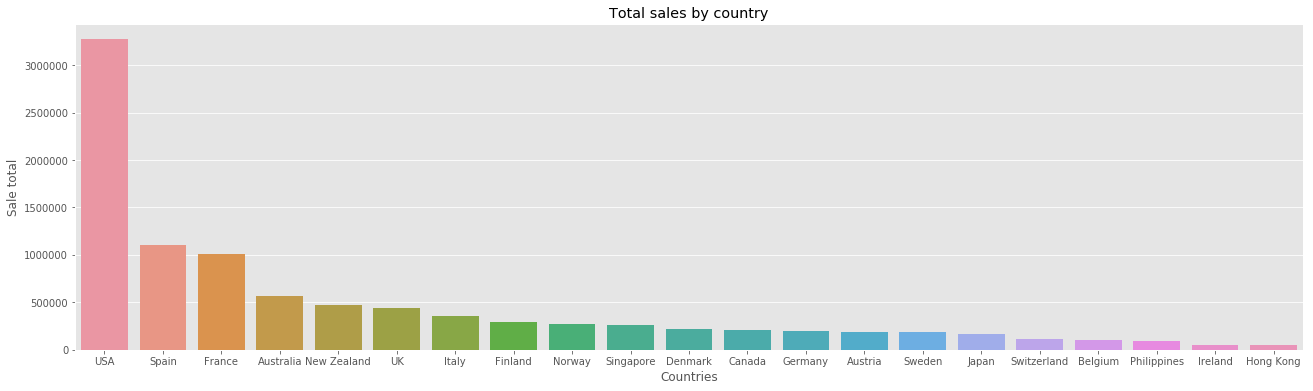

In [15]:
plt.figure(figsize=(22, 6))
sns.barplot(df2.country, df2.total)
plt.title('Total sales by country')
plt.xlabel('Countries')
plt.ylabel('Sale total')

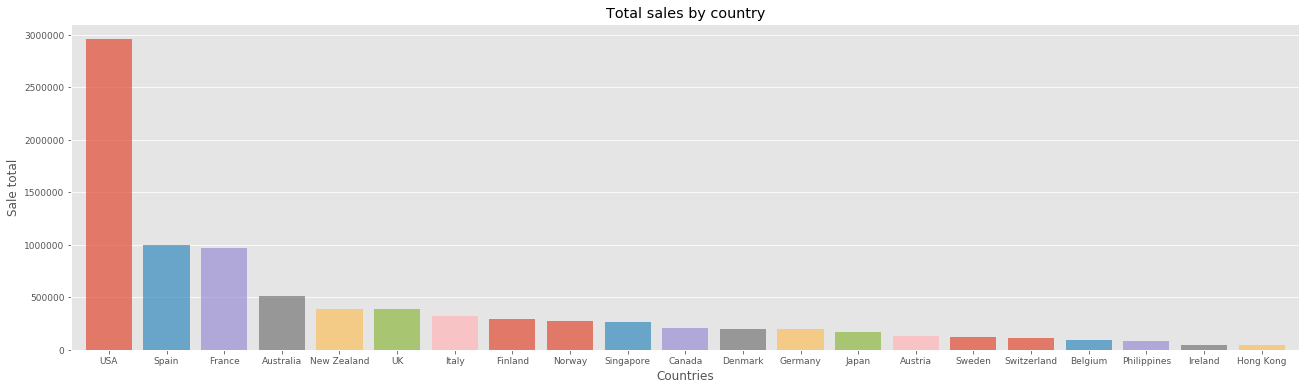

In [16]:
df1.index=df1.country
df1=df1.total.plot.bar(figsize=(22,6),fontsize=9, 
                       title='Total sales by country', width=0.8, grid=False, alpha=0.7, rot=0)
df1.set_xlabel("Countries", fontsize=12)
df1.set_ylabel("Sale total", fontsize=12)
plt.grid(axis='y')
plt.show()

(0, 5000000)

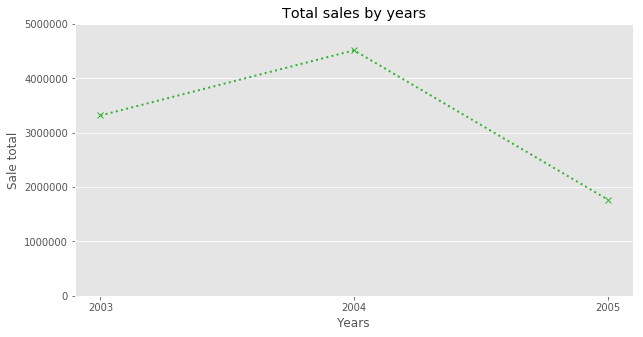

In [17]:
plt.figure(figsize=(10, 5))
plt.xticks(df4.year)
plt.plot( df3.year, df3.total,  
         marker='x', linestyle=':', color='#34b233',linewidth=2)
plt.grid(axis='x')
plt.title('Total sales by years')
plt.xlabel('Years')
plt.ylabel('Sale total')
plt.ylim(0, 5000000)

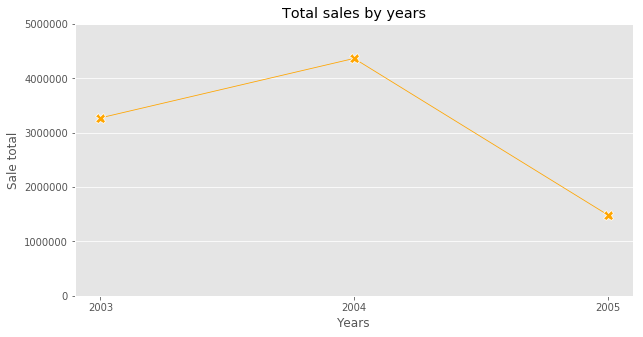

In [18]:
df4.index=df4.year
plt.figure(figsize=(10, 5))
plt.xticks(df4.year)
sns.lineplot(df4.year, df4.total,  linestyle='-', marker='X', color="orange", markersize=10, linewidth=0.8)
plt.ylim(0, 5000000)
plt.grid(axis='x')
plt.title('Total sales by years')
plt.xlabel('Years')
plt.ylabel('Sale total')
plt.show()

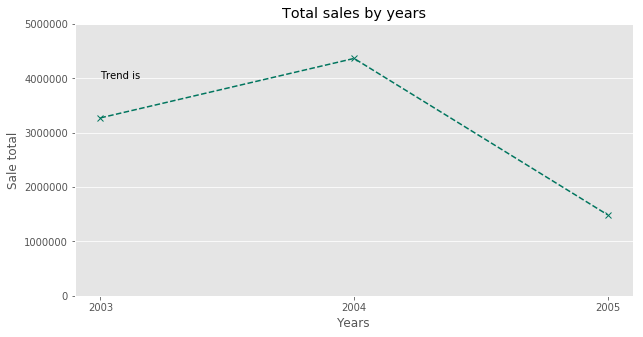

In [19]:
df4.index=df4.year
df4.total.plot.line(xticks=df4.year, marker='x',ylim=(0, 5000000),figsize=(10, 5),linestyle='--',
                    color='#00755e',title='Total sales by years')
plt.xlabel('Years')
plt.ylabel('Sale total')
plt.annotate(f"Trend is ", (df4.index[0], 4000000))
plt.grid(axis='x')

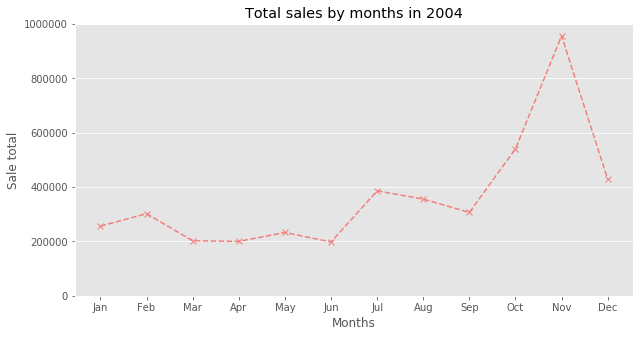

In [21]:
df5.total.plot.line(xticks=range(len(df5.month)), marker='x', ylim=(0, 1000000),figsize=(10, 5),linestyle='--',
                    color='#f08080',title='Total sales by months in 2004')
plt.xlabel('Months')
plt.ylabel('Sale total')
plt.grid(axis='x')
plt.show()